In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [281]:
dataset = pd.read_csv('D3.csv')
dataset.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [282]:
x1 = dataset.values[:,0]
x2 = dataset.values[:,1]
x3 = dataset.values[:,2]
y = dataset.values[:, 3]
m = len(y)

print('x1 = ', x1[: 5])
print('x2 = ', x2[: 5])
print('m = ', m)

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
x2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
m =  100


In [283]:
x0 = np.ones((m, 1))
x0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [284]:
X1 = x1.reshape(m,1)
X2 = x2.reshape(m,1)
X3 = x3.reshape(m,1)

X1[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [285]:
x1 = np.hstack((x0, X1))
x2 = np.hstack((x0, X2))
x3 = np.hstack((x0, X3))
x4 = np.hstack((x0, X1, X2, X3))
x4[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [286]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [287]:
def get_loss(x4, y, theta):
    
    H = x4.dot(theta)
    error = np.subtract(H, y)
    sqrError = np.square(error)
    J = 1 / (2 * m) * np.sum(sqrError)
    
    return J

In [288]:
def gradient_descent(x4, y, theta, alpha, iterations):
    
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        H = x4.dot(theta)
        error = np.subtract(H, y)
        sum_delta = (alpha / m) * x4.transpose().dot(error);
        theta = theta - sum_delta;
        cost_history[i] = get_loss(x4, y, theta)
        
    return theta, cost_history
    

In [289]:
theta = np.zeros(4)
iterations = 1500;
alpha = 0.01;

In [290]:
theta, cost_history = gradient_descent(x4, y, theta, alpha, iterations)

print(theta)
print(cost_history)

[ 4.15118728 -1.8394291   0.72473856 -0.09513266]
[5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


In [ ]:
J_cost = get_loss(x4, y, theta)

print(J_cost)

In [ ]:
h1 = theta[0] + (1)*theta[1] + (1)*theta[2] + (1)*theta[3]
h1


In [297]:
h2 = theta[0] + (2)*theta[1] + (0)*theta[2] + (3)*theta[3]
h2

0.1869310948460312

In [298]:
h3 = theta[0] + (3)*theta[1] + (2)*theta[2] + (1)*theta[3]
h3

-0.012755552822328348

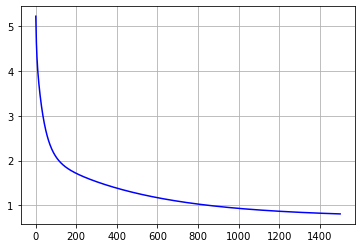

In [300]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()